# Importing different libraries of python for the exploration of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ABOUT DATASET

 This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

# Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Loading the data for analysis using pandas library

In [2]:
cs=pd.read_csv(r"C:\Users\KAUSHIK\OneDrive\Desktop\DataScience Fullstack\Analysis on Mall Customer\Mall_Customers.csv")

In [3]:
cs.shape

(200, 5)

# DATA CLEANING

In [4]:
cs.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Context


* You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.


* Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [5]:
cs.isnull() #Checking the null values if there in dataset.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [6]:
cs.dtypes      # Returns different datatypes for each columns (float, int, string, bool, etc.)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
cs.info()   #It  prints information about a DataFrame including the index dtype and columns,
            #non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
cs.isnull().sum()  #Counts the number of null values in a column.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* There are no null values in the dataset .

In [9]:
cs.describe()   #Retuens the description of data .
                #If it contains any numerical data it provides its count,mean,standard deviation,minimum and
                #percentile (25%,50%,75%,100% or max).

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
cs.nunique()  #Returns number of unique values.

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
# Creating the copy of dataset
cs_copy = cs.copy(deep=True)

In [12]:
cs_copy.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
# Dropping the column of 'CustomerID' as it does not provide any value
cs_copy.drop('CustomerID', axis=1, inplace=True)
cs_copy.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# EDA ON BLACK FRIDAY SALE DATASET

HEATMAP FOR CORRELATION

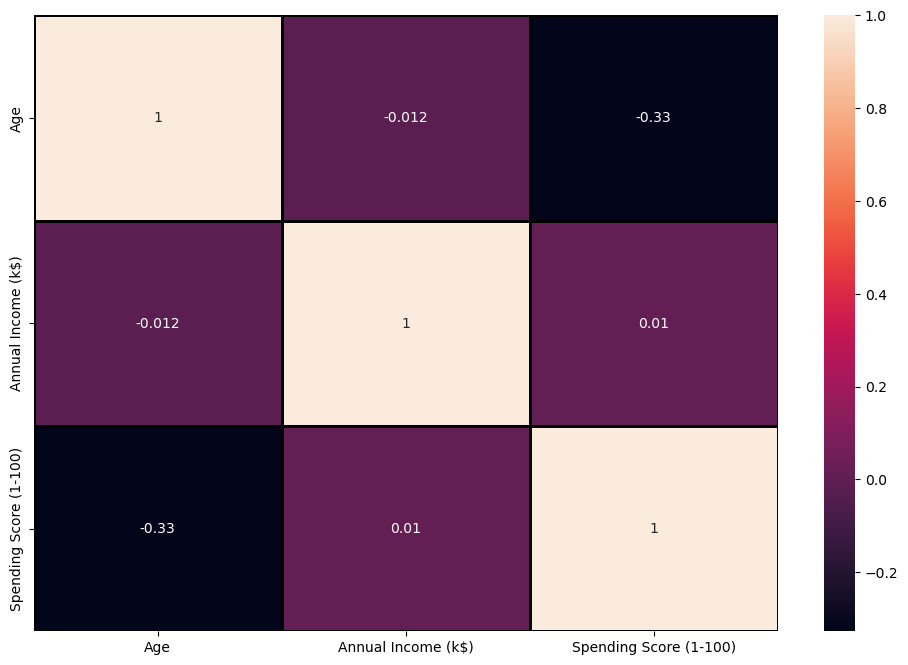

In [14]:
corrmap=cs_copy.corr().round(3)
plt.figure(figsize=(12,8))
sns.heatmap(corrmap,linewidth=2,linecolor='black',annot=True)
plt.show()

GENDER PLOT

Text(0, 0.5, 'Count')

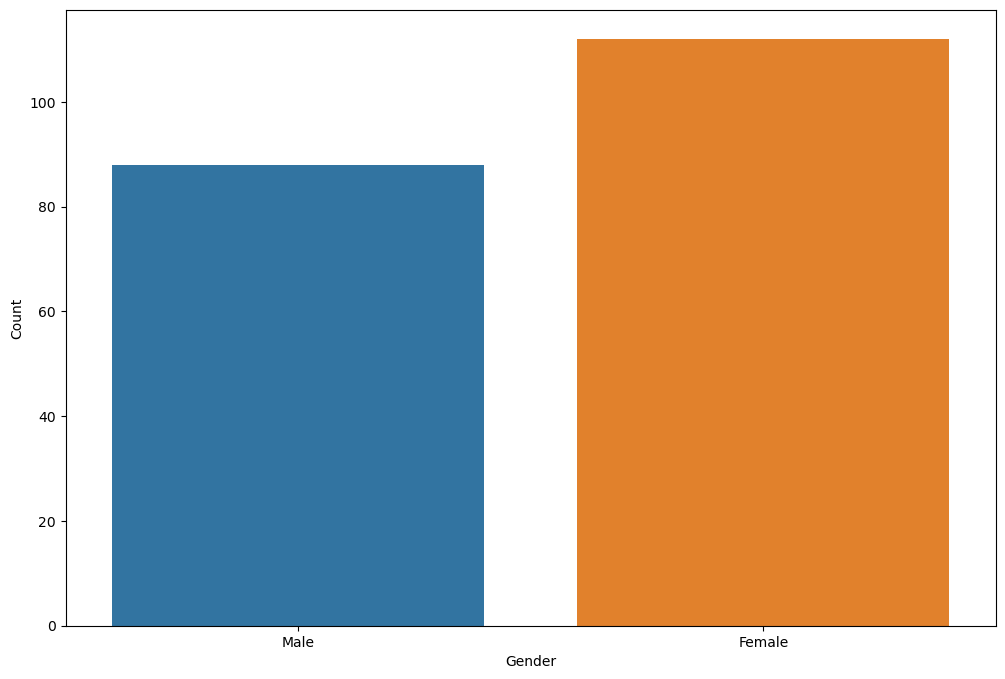

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='Gender', data=cs_copy)         # Visualising the columns 'Gender' using Countplot
plt.xlabel('Gender')
plt.ylabel('Count')

* From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.

AGE PLOT

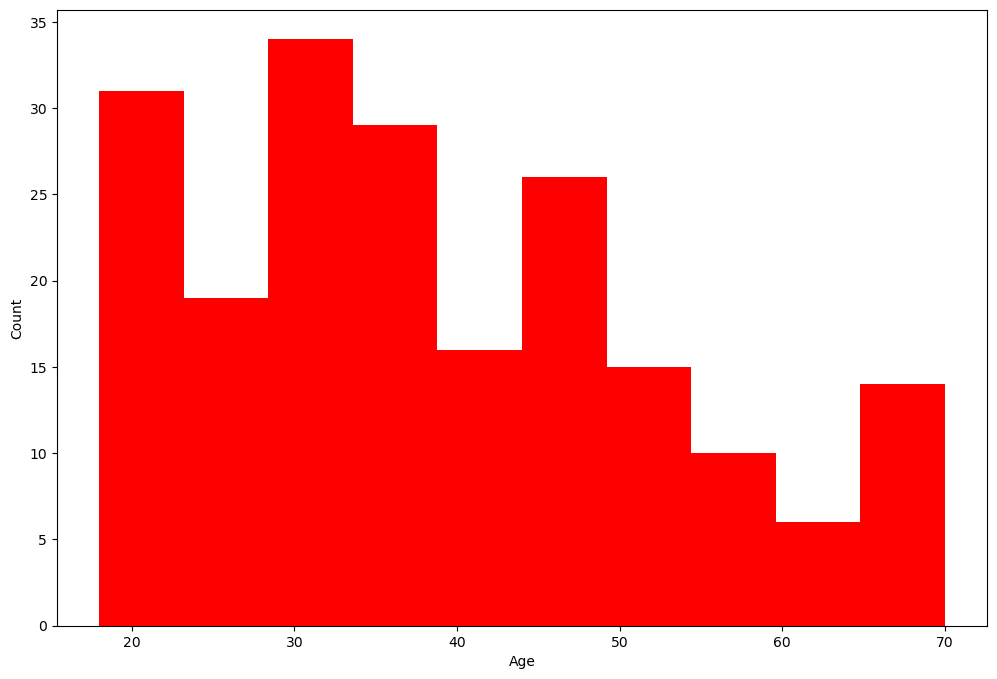

In [16]:
plt.figure(figsize=(12,8))
plt.hist(x=cs_copy['Age'], bins=10, orientation='vertical', color='red') # Visualising the columns 'Age' using Histogram
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

AGE VS SPENDING SCORE

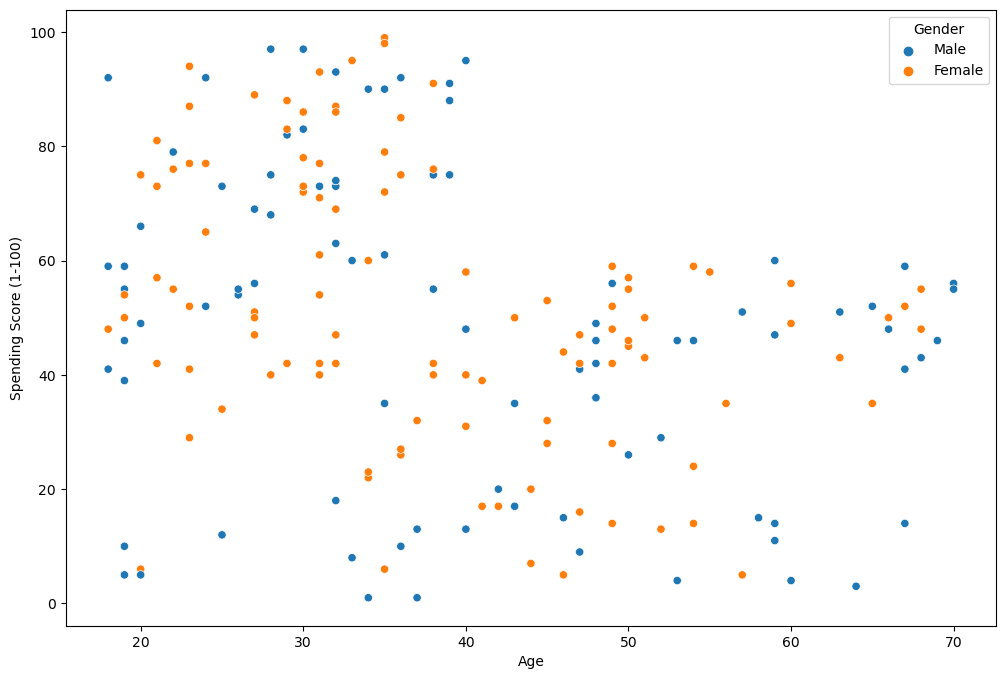

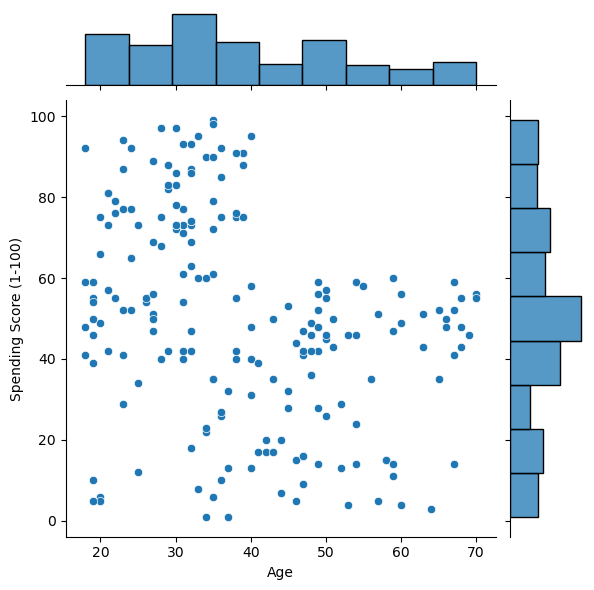

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=cs_copy, x='Age', y='Spending Score (1-100)', hue='Gender') # Visualising the columns 'Age', 'Spending Score (1-100)' using 

sns.jointplot(data=cs_copy, x='Age', y='Spending Score (1-100)')                 #Scatterplot and Jointplot

1. From the Age Vs Spending Score plot we observe that customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.


2. Also, the customers having average spending score ie: in the range of 40-60 consists of age group of the range 15-75 years and the count of Male and Female in this age group is also approximatly the same.

ANNUAL INCOME VS SPENDING SCORE

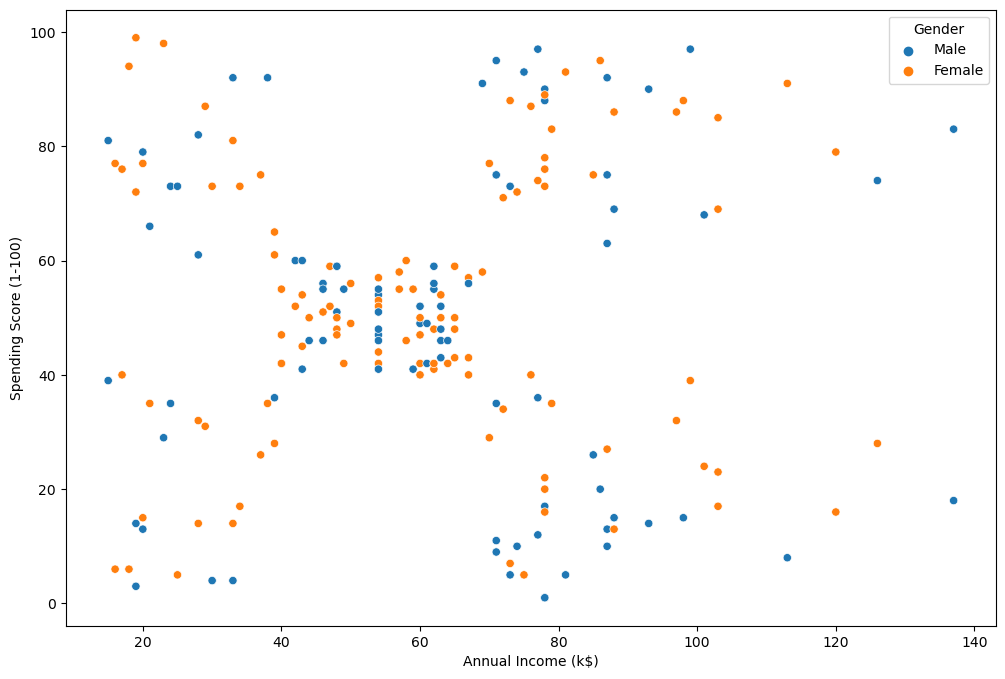

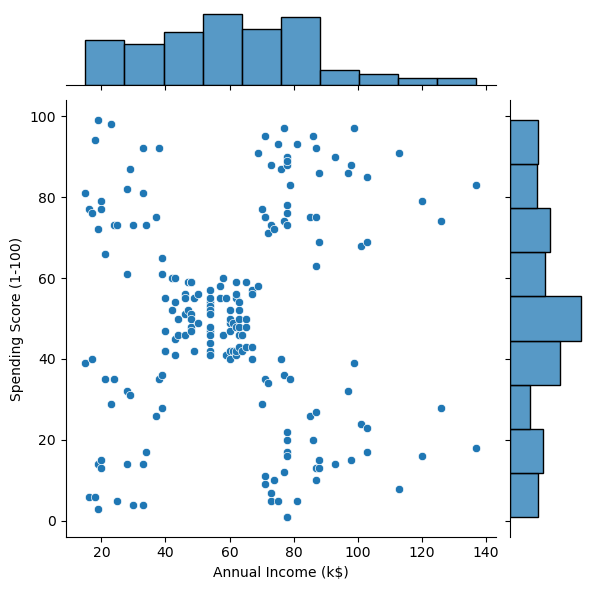

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=cs_copy, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')    # Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)'
sns.jointplot(data=cs_copy, x='Annual Income (k$)', y='Spending Score (1-100)')                    # using Scatterplot and Jointplot    

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:

________________________________________________________________________________________________________________________________

a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

# DATA PREPROCESSING

In [19]:
# Selecting 'Annual Income' and 'Spending Score' as the features for clustering
X = cs_copy.iloc[:, [2,3]]

In [20]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# ALGORITHMS PREPARERATION

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Finding optimal number of clusters using Elbow Method

In [22]:
# Calculating WCSS values for 1 to 10 clusters
WCSS = []
for i in range(1,11):
    
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_model.fit(X)
    WCSS.append(kmeans_model.inertia_)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


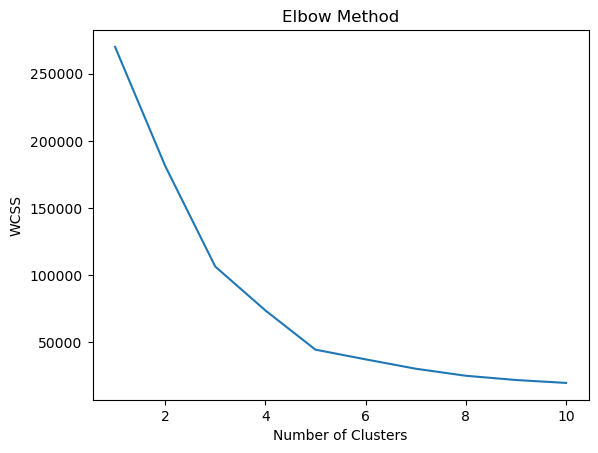

In [23]:
# Plotting the WCSS values
plt.plot(range(1,11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot it is observed that 5 clusters are optimal for the given dataset.

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values .

# KMeans Models

In [25]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

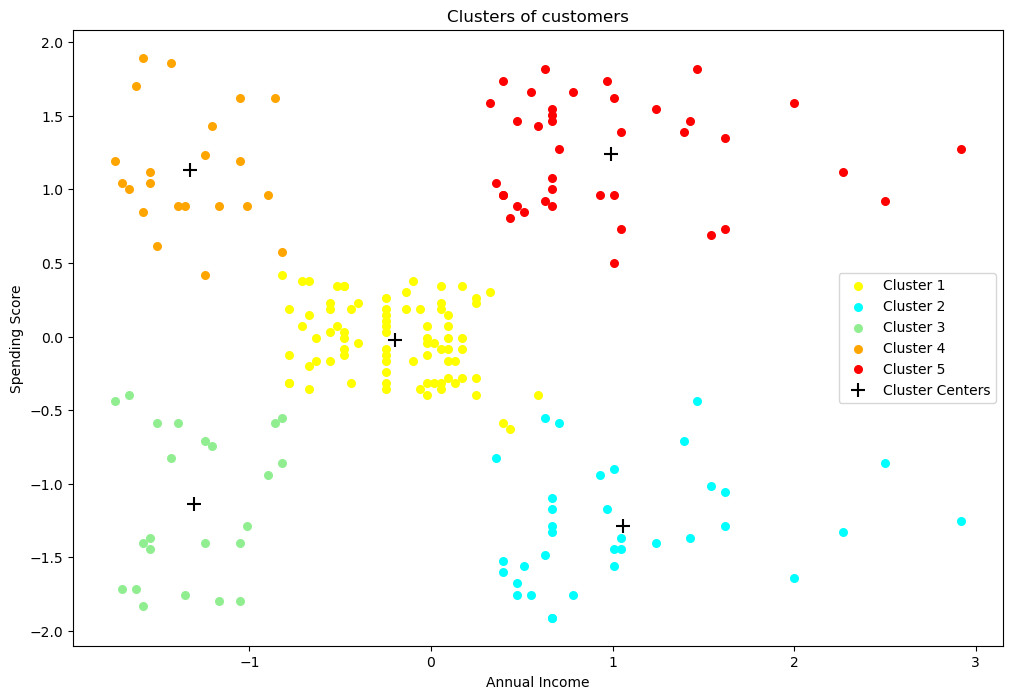

In [26]:
# Visualising the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Clustering - Observation

a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 4) - Don't target these customers since they have less income and need to save money.